In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
# create a function to plot cost
def plot_cost(loss):
    plt.figure()
    plt.plot(np.arange(len(loss)), loss)
    plt.xlabel("epochs")
    plt.ylabel("cost")
    plt.show()

In [3]:
class logistic_regression(object):
    def __init__(self, X, y , K):
       
        self.d = X.shape[1]
        self.m = X.shape[0]
        self.K = K
        self.X = X
        self.Y = self.oneHotIt(y)      
        
        #initialize random value to w and b 
        self.W =  np.random.uniform(-0.01, 0.01, (self.d, self.K))
        self.grad = np.zeros((self.d, self.K))
        self.costs = []

    def oneHotIt(self,Y):
        OHX = scipy.sparse.csr_matrix((np.ones(self.m), (Y, np.array(range(self.m)))))
        OHX = np.array(OHX.todense()).T
        return OHX
    
    def softmax(self, z):
        z -= np.max(z)
        sm = (np.exp(z).T / np.sum(np.exp(z),axis=1)).T
        return sm
    
    def costFunction(self):
        z = np.dot(self.X,self.W)
        prob = self.softmax(z)
        cost = (-1.) * np.sum(self.Y * np.log(prob)) 
        grad = (-1./self.m) * np.dot(self.X.T,(self.Y - prob))
        return cost , grad
    
    def adap_learning_rate(self, max_iter , epochCounter , maxLR = 0.1 , minLR = 0.01):
        #triangular cyclical learning rate
        stepsize = max_iter /2
        cycle = np.floor(1 + epochCounter / ( 2 * stepsize))
        s = abs(epochCounter / stepsize - 2 * cycle + 1 )
        lr = minLR + (maxLR - minLR) * max(0 , (1 - s ))
        return lr
    
    
    def fit(self, max_iter = 1000 , epsilon=0.00001):
           
        for i in range(max_iter):
            lr = self.adap_learning_rate (max_iter , i) 
            
            cost , grad = self.costFunction()
            self.costs.append(cost)        
            
            self.W -= (lr * grad)        
            
            if i % 100 == 0:
                print ("epoch: ", str(i), " cost: ", str(np.round(cost,2)))

            if (np.amax(abs(self.grad - grad)) < epsilon):
                print("Converage in epoch:" , i)
                break;

            self.grad = grad


    def predict(self, x):  
        z = np.dot(x,self.W)
        probs = self.softmax(z)    
        r = np.argmax(probs ,axis=1)
        return r

    

### Preparing data 

In [4]:
iris_data = datasets.load_iris(return_X_y=False)
df_iris = pd.DataFrame(data= np.c_[iris_data['data'], iris_data['target']], columns= iris_data['feature_names'] + ['target'])

X_iris = df_iris[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']].to_numpy()
y = df_iris[['target']].to_numpy(dtype=int).ravel()
K = df_iris["target"].unique().shape[0]

N = X_iris.shape[0]
# number of features + b
d = X_iris.shape[1]  + 1

# prepare a data set and add x0 and equal it to one  
X = np.ones((N , d))
X[: , 1:d ]  = X_iris


#spilit the train set and test set
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.2,random_state=0)


epoch:  0  cost:  131.76
epoch:  100  cost:  70.23
epoch:  200  cost:  51.84
epoch:  300  cost:  41.61
epoch:  400  cost:  34.15
epoch:  500  cost:  28.59
epoch:  600  cost:  25.03
epoch:  700  cost:  22.98
epoch:  800  cost:  21.75
Converage in epoch: 868


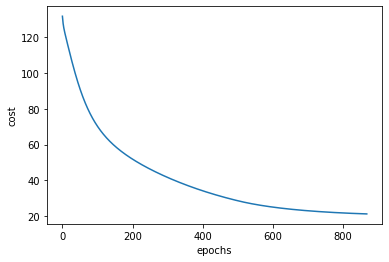

In [5]:
logistic = logistic_regression(train_X, train_y, K)
logistic.fit(max_iter = 1000 , epsilon=0.00001)
plot_cost(logistic.costs)

#### Report logistic discrimination weights

In [6]:
print("Coefficients :")
print(logistic.W.T)

Coefficients :
[[ 0.33495588  0.69918005  1.58538929 -2.25103274 -1.04527022]
 [ 0.46488974  0.52721499 -0.24436306 -0.02034846 -0.75715845]
 [-0.7900614  -1.22150789 -1.33637707  2.27651969  1.81499236]]


### Compate Result with LogisticRegression() Library

In [ ]:
predict_train = logistic.predict(train_X)
predict_test = logistic.predict(test_X)
  
print("Accuracy Code on Train set:" ,  np.round(accuracy_score(train_y, predict_train) * 100, 3))
print("Accuracy Code on Test set:" ,  np.round(accuracy_score(test_y, predict_test) * 100, 3))
print("")
clf = LogisticRegression().fit(train_X, train_y)
predict_train_lib = clf.predict(train_X)
predict_test_lib = clf.predict(test_X)

print("Accuracy Library on Train set:" , np.round(accuracy_score(train_y, predict_train_lib) * 100 , 3))
print("Accuracy Library on Test set:"  , np.round(accuracy_score(test_y, predict_test_lib) * 100 , 3))
print("")

print("Code result :   " , predict_test)
print("Library result :" , predict_test_lib)